## Neural Networks Learning Using Scikit-Learn

In [1]:
%matplotlib inline
# To get nice quality plots
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sop
from scipy.io import loadmat

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix

### Read Data

In [2]:
data = loadmat('data/ex4data1.mat')
X = data['X']
y = data['y']
(m, n) = X.shape
print(f"X shape: {X.shape}, y shape: {y.shape}")

X shape: (5000, 400), y shape: (5000, 1)


### Visualize Data

In [3]:
# Function to show some random immages of handwritten numbers
def displayData(X, nr_examples):
    m, n = X.shape
    example_width = int(np.round(np.sqrt(n)))
    example_height = n // example_width
    
    display_rows = int(np.floor(np.sqrt(nr_examples)))
    display_cols = int(np.ceil(nr_examples / display_rows))
    
    _, axarr = plt.subplots(display_rows, display_cols, figsize=(display_rows, display_cols))
    
    for i in range(display_rows):
        for j in range(display_cols):
            axarr[i,j].imshow(X[np.random.randint(m)].reshape(example_width, example_height, order = 'F'), cmap='gray')
            axarr[i,j].axis('off')

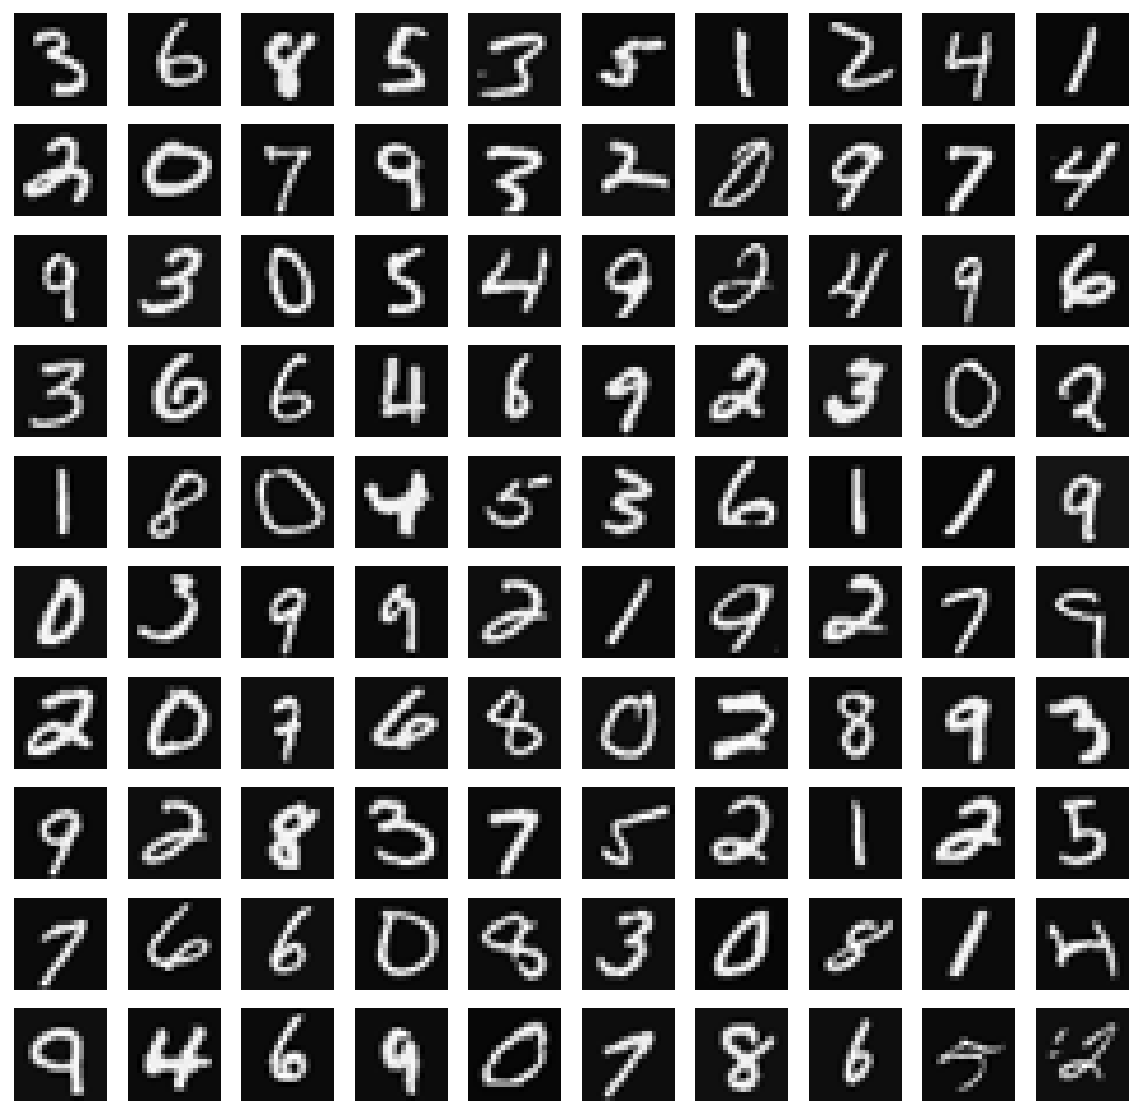

In [4]:
# Show some sample images
displayData(X, 100)

### Model

In [5]:
# Define neural network with 1 hidden layer of size 25, alpha is the regularization parameter (= lambda)
nn_classifier = MLPClassifier(hidden_layer_sizes=(25,), activation='logistic', solver='lbfgs', alpha=1)

# Train model
nn_classifier.fit(X, y.ravel())

MLPClassifier(activation='logistic', alpha=1, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(25,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [6]:
# Save the learned weights (sklearn saves the intercept term seperately)
Theta1_opt, Theta2_opt = nn_classifier.coefs_

# Add intercept
Theta1_opt = np.vstack([nn_classifier.intercepts_[0], Theta1_opt])
Theta2_opt = np.vstack([nn_classifier.intercepts_[1], Theta2_opt])

### Results

In [7]:
# Print weight shapes, notice these do not contain bias units:
print("Theta1 shape: ", Theta1_opt.shape, "\nTheta2 shape: ", Theta2_opt.shape)

Theta1 shape:  (401, 25) 
Theta2 shape:  (26, 10)


In [8]:
# Calculate accuracy on training data
nn_classifier.score(X, y)

0.9974

In [9]:
y_pred = nn_classifier.predict(X)
report = classification_report(y, y_pred)
print(report)

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       500
           2       1.00      1.00      1.00       500
           3       1.00      1.00      1.00       500
           4       1.00      0.99      1.00       500
           5       1.00      1.00      1.00       500
           6       1.00      1.00      1.00       500
           7       1.00      1.00      1.00       500
           8       1.00      1.00      1.00       500
           9       0.99      0.99      0.99       500
          10       1.00      1.00      1.00       500

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



In [10]:
# Confusion matrix
confusion_matrix_df = pd.DataFrame(confusion_matrix(y, y_pred), range(1, 11), range(1, 11))
confusion_matrix_df

,1,2,3,4,5,6,7,8,9,10
1,500,0,0,0,0,0,0,0,0,0
2,0,500,0,0,0,0,0,0,0,0
3,0,0,498,0,0,0,1,0,1,0
4,1,0,0,497,0,0,0,0,2,0
5,0,1,0,0,499,0,0,0,0,0
6,0,0,0,0,0,500,0,0,0,0
7,1,1,0,0,0,0,498,0,0,0
8,0,0,0,0,0,0,0,500,0,0
9,0,0,2,0,0,0,1,0,496,1
10,0,0,0,0,0,1,0,0,0,499


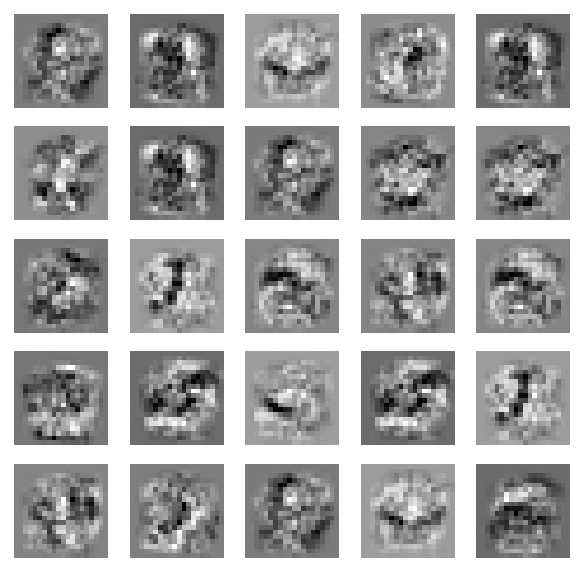

In [11]:
# Visualize hidden unit
displayData(Theta1_opt.T[:, 1:], 25)